In [1]:
# install packages
!pip install yfinance pandas numpy matplotlib seaborn plotly statsmodels


In [2]:
# Imports and Basic Setup

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use("seaborn-v0_8")

# List of 10 stocks we will use across the project
TICKERS = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META",
    "TSLA", "NVDA", "JPM", "NFLX", "DIS"
]


In [8]:
# Function to Download Stock Data

def download_stock_data(ticker, start="2015-01-01", end=None):
    data = yf.download(ticker, start=start, end=end)

    # Handle column differences
    if "Adj Close" in data.columns:
        data = data[["Adj Close"]].rename(columns={"Adj Close": "price"})
    elif "Close" in data.columns:
        data = data[["Close"]].rename(columns={"Close": "price"})
    else:
        raise ValueError(f"No valid price column found for {ticker}. Columns returned: {data.columns}")

    data.dropna(inplace=True)
    return data



In [9]:
aapl = download_stock_data("AAPL")
aapl.head()



/tmp/ipython-input-3354765693.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,price
Ticker,AAPL
Date,
2015-01-02,24.237551
2015-01-05,23.554737
2015-01-06,23.556959
2015-01-07,23.887283
2015-01-08,24.805088


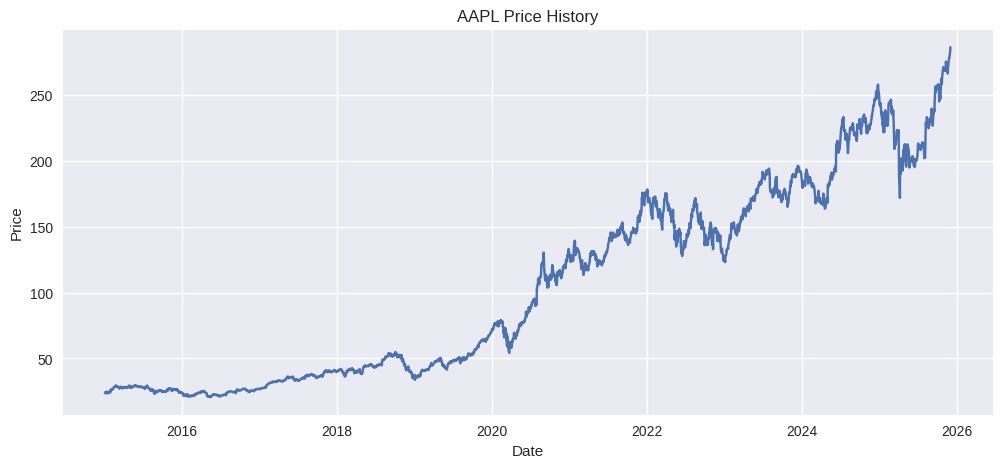

In [11]:
# Visualize AAPL’s Time Series

plt.figure(figsize=(12,5))
plt.plot(aapl.index, aapl["price"])
plt.title("AAPL Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


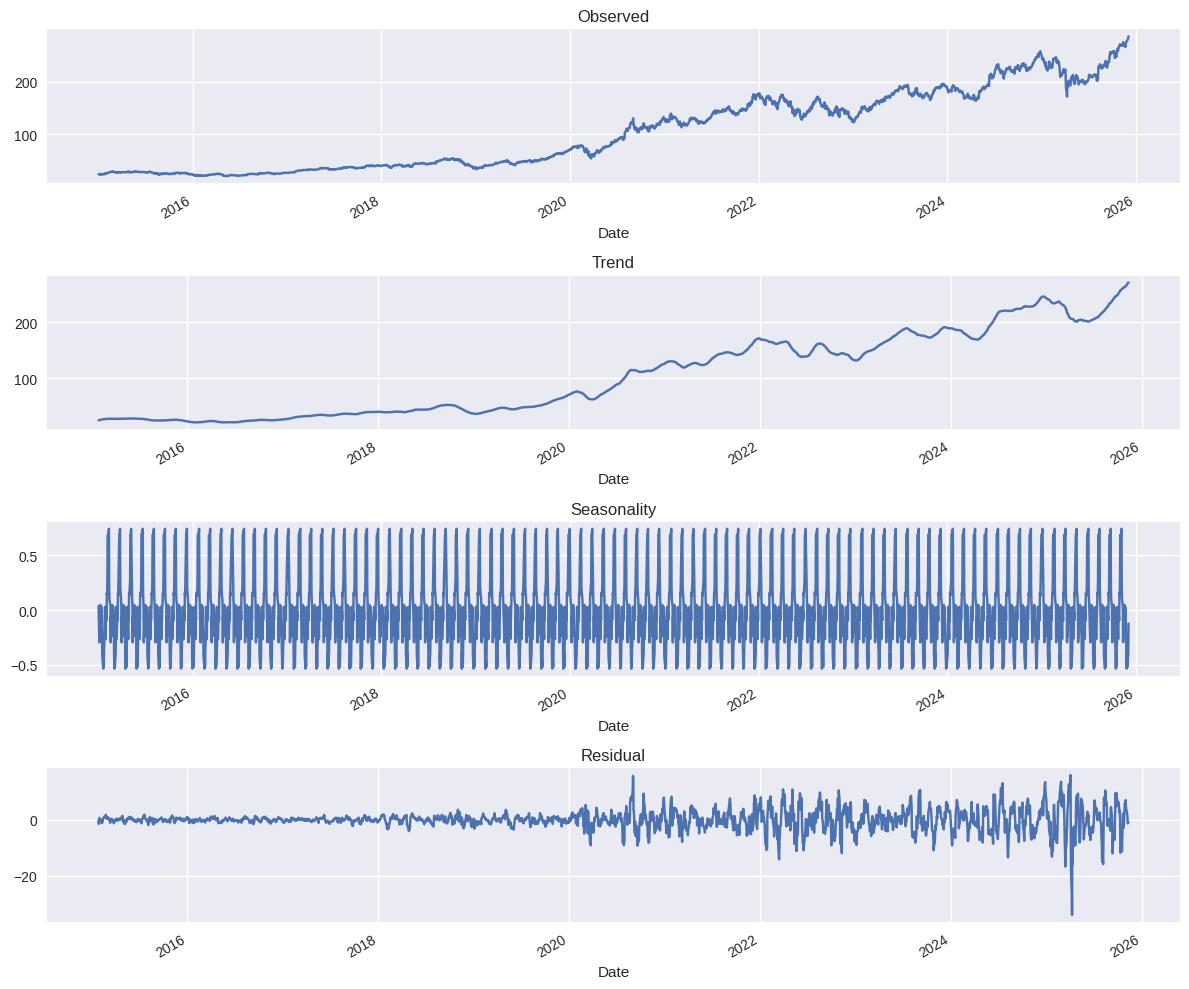

In [12]:
# Time Series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(aapl["price"], model="additive", period=30)

fig, axes = plt.subplots(4, 1, figsize=(12, 10))
result.observed.plot(ax=axes[0], title="Observed")
result.trend.plot(ax=axes[1], title="Trend")
result.seasonal.plot(ax=axes[2], title="Seasonality")
result.resid.plot(ax=axes[3], title="Residual")
plt.tight_layout()
plt.show()
